<a href="https://colab.research.google.com/github/achanthaphaeng/Projects/blob/main/4605_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
from google.colab import files
import io

In [ ]:
# Read in data and select appropriate data
dat = pd.read_csv('1-5-Network.csv').fillna(0)


col_names = dat.columns[3:48]
# Get all combinations of choice sets to find edges
combos = combinations(col_names,2)
edge_weights = pd.DataFrame(columns = ['n1','n2','weight'])
for entry in combos:
  #If students pick > 1 option, count number of edges between those two options
  weight = sum(dat[entry[0]].astype('bool') & dat[entry[1]].astype('bool'))
  edge_weights = edge_weights.append({'n1':entry[0],
                  'n2':entry[1],
                  'weight':weight}, ignore_index=True)
#print(edge_weights)
# Weights are edges where n1 is first entry and n2 is second and weight is self explanatory
#node_weights = dat[col_names].sum()
#print(node_weights)

# Calculating node weights based on opposite numbers.  
# Highest priority (1) should add more weight, lowest priority (5) should add less weight.  
# Priority 5 = weight + 1; Priority 4 = weight + 2;  Priority 3 = weight + 3; Priority 2 = weight + 4; Priority 1 = weight + 5
node_weights2 = pd.DataFrame(columns=['n1','weight'])
for col_name in dat.columns[3:48]:
  rowSum = 0
  for index, row in dat.iterrows():
    if row[col_name] == 5.0: rowSum += 1
    if row[col_name] == 4.0: rowSum += 2
    if row[col_name] == 3.0: rowSum += 3
    if row[col_name] == 2.0: rowSum += 4
    if row[col_name] == 1.0: rowSum += 5
    #print('Col: ', col_name, row[col_name])
  node_weights2 = node_weights2.append({'n1':col_name, 'weight':rowSum}, ignore_index=True)


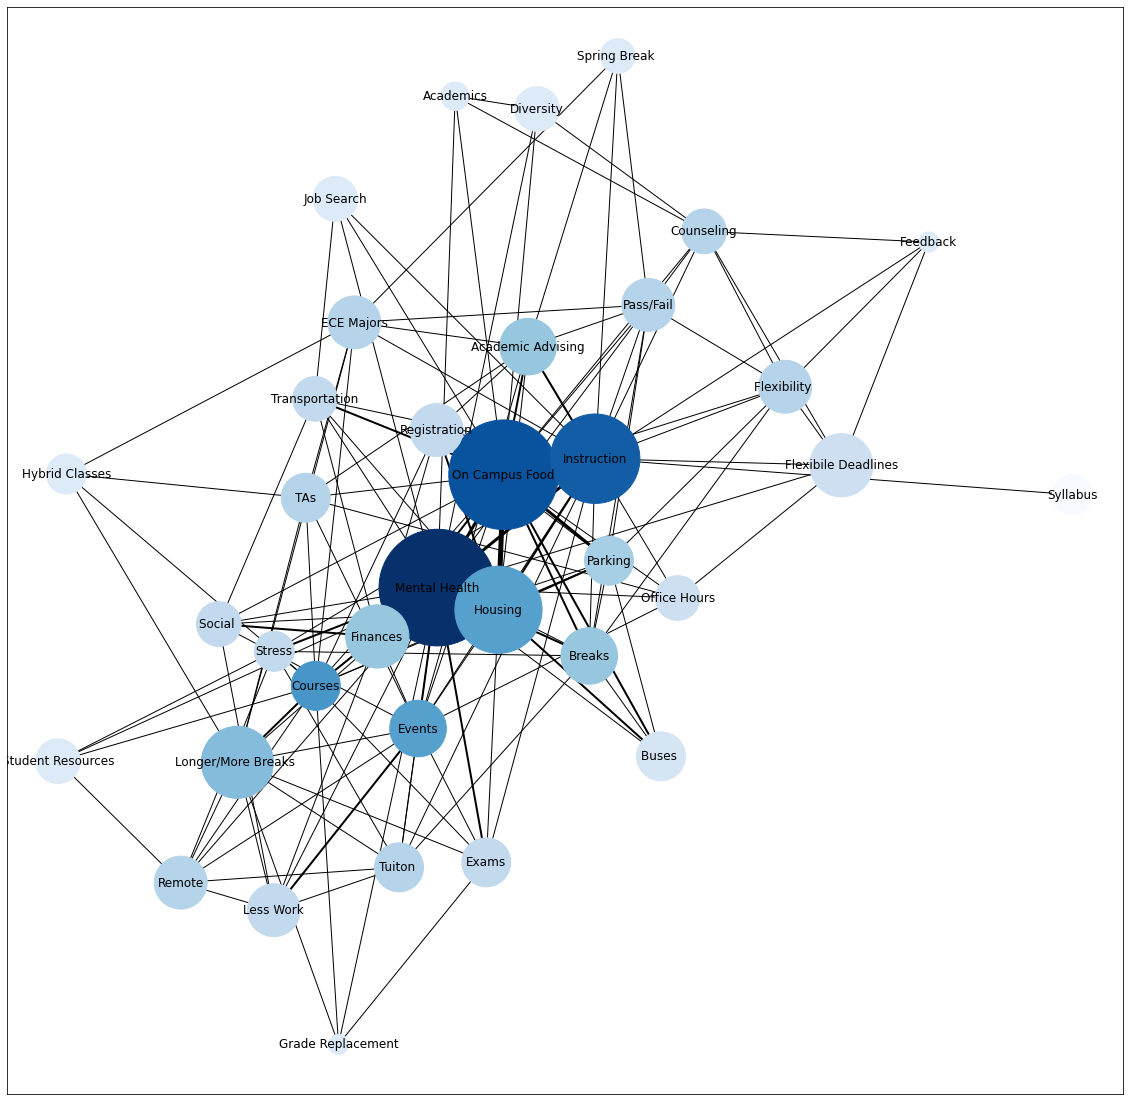

In [ ]:
# Create networkx edge list based on edge_weights list
G = nx.from_pandas_edgelist(edge_weights, "n1", "n2", "weight")
# Get list of edge weights in order to remove edges with 0 weight, meaning there is no connection between those two nodes
weights = nx.get_edge_attributes(G,'weight')
# Remove 0 weight edges
G.remove_edges_from((edge for edge,weight in weights.items() if weight == 0))
# Assign weight attribute to each node based on values in node_weights
# Based on node_weights2 dataframe.  Using first column n1 as index
nodeAttr = node_weights2.set_index('n1').to_dict('index')
nx.set_node_attributes(G, nodeAttr)
# Set plot size so network map is not cramped
plt.figure(figsize = (20,20))
# Set node color to the degree of the node, aka how many links are connected to the node
node_color = [G.degree(v) for v in G]
# Set size of the node based on the weight of the node
# Scaled by 400 for visibility on the graph  
node_size = [400 * nx.get_node_attributes(G, 'weight')[v] for v in G]
# Draw network
#pos = nx.shell_layout(G)
#nx.draw_networkx_edges(G,pos,)
edge_width = [a[2]['weight'] for a in G.edges(data=True)]
'''
for entry in edge_width:
  print(entry)
for entry in edge_weights['weight']:
  print(entry)

print(len(edge_width))
print(len(edge_weights))
'''
nx.draw_networkx(G, node_size = node_size, node_color = node_color, alpha = 1.0, with_labels=True, cmap = plt.cm.Blues, width=edge_width) #width=edge_weights['weight'])

In [ ]:
# Read in data and select appropriate data
dat = pd.read_csv('11-15-Network.csv').fillna(0)
col_names = dat.columns[3:48]
# Get all combinations of choice sets to find edges
combos = combinations(col_names,2)
edge_weights = pd.DataFrame(columns = ['n1','n2','weight'])
for entry in combos:
  #If students pick > 1 option, count number of edges between those two options
  weight = sum(dat[entry[0]].astype('bool') & dat[entry[1]].astype('bool'))
  edge_weights = edge_weights.append({'n1':entry[0],
                  'n2':entry[1],
                  'weight':weight}, ignore_index=True)
#print(edge_weights)
# Weights are edges where n1 is first entry and n2 is second and weight is self explanatory
#node_weights = dat[col_names].sum()
#print(node_weights)

# Calculating node weights based on opposite numbers.  
# Highest priority (1) should add more weight, lowest priority (5) should add less weight.  
# Priority 5 = weight + 1; Priority 4 = weight + 2;  Priority 3 = weight + 3; Priority 2 = weight + 4; Priority 1 = weight + 5
node_weights2 = pd.DataFrame(columns=['n1','weight'])
for col_name in dat.columns[3:48]:
  rowSum = 0
  for index, row in dat.iterrows():
    if row[col_name] == 15.0: rowSum += 1
    if row[col_name] == 14.0: rowSum += 2
    if row[col_name] == 13.0: rowSum += 3
    if row[col_name] == 12.0: rowSum += 4
    if row[col_name] == 11.0: rowSum += 5
    #print('Col: ', col_name, row[col_name])
  node_weights2 = node_weights2.append({'n1':col_name, 'weight':rowSum}, ignore_index=True)


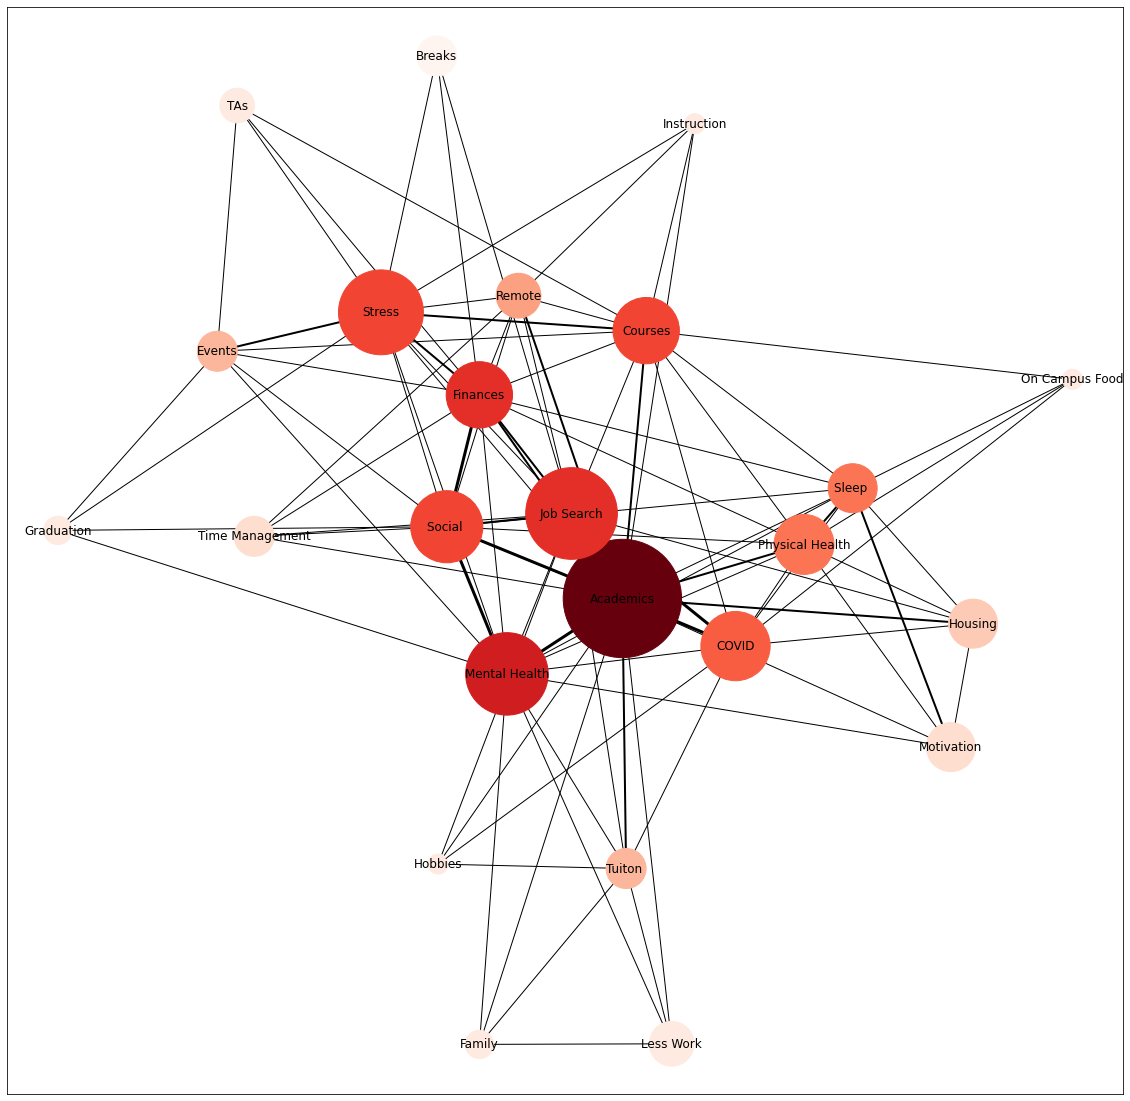

In [ ]:
# Create networkx edge list based on edge_weights list
G = nx.from_pandas_edgelist(edge_weights, "n1", "n2", "weight")
# Get list of edge weights in order to remove edges with 0 weight, meaning there is no connection between those two nodes
weights = nx.get_edge_attributes(G,'weight')
# Remove 0 weight edges
G.remove_edges_from((edge for edge,weight in weights.items() if weight == 0))
# Assign weight attribute to each node based on values in node_weights
# Based on node_weights2 dataframe.  Using first column n1 as index
nodeAttr = node_weights2.set_index('n1').to_dict('index')
nx.set_node_attributes(G, nodeAttr)
# Set plot size so network map is not cramped
plt.figure(figsize = (20,20))
# Set node color to the degree of the node, aka how many links are connected to the node
node_color = [G.degree(v) for v in G]
# Set size of the node based on the weight of the node
# Scaled by 400 for visibility on the graph  
node_size = [400 * nx.get_node_attributes(G, 'weight')[v] for v in G]
# Draw network
#pos = nx.shell_layout(G)
#nx.draw_networkx_edges(G,pos,)
edge_width = [a[2]['weight'] for a in G.edges(data=True)]
'''
for entry in edge_width:
  print(entry)
for entry in edge_weights['weight']:
  print(entry)

print(len(edge_width))
print(len(edge_weights))
'''
nx.draw_networkx(G, node_size = node_size, node_color = node_color, alpha = 1.0, with_labels=True, cmap = plt.cm.Reds, width=edge_width) #width=edge_weights['weight'])

In [ ]:
# Read in data and select appropriate data
dat = pd.read_csv('network-cleaned.csv').fillna(0)
col_names = dat.columns[3:48]
# Get all combinations of choice sets to find edges
combos = combinations(col_names,2)
edge_weights = pd.DataFrame(columns = ['n1','n2','weight'])
for entry in combos:
  #If students pick > 1 option, count number of edges between those two options
  weight = sum(dat[entry[0]].astype('bool') & dat[entry[1]].astype('bool'))
  edge_weights = edge_weights.append({'n1':entry[0],
                  'n2':entry[1],
                  'weight':weight}, ignore_index=True)

#print(edge_weights)
# Weights are edges where n1 is first entry and n2 is second and weight is self explanatory
#node_weights = dat[col_names].sum()
#print(node_weights)

# Calculating node weights based on opposite numbers.  
# Highest priority (1) should add more weight, lowest priority (5) should add less weight.  
# Priority 5 = weight + 1; Priority 4 = weight + 2;  Priority 3 = weight + 3; Priority 2 = weight + 4; Priority 1 = weight + 5
node_weights2 = pd.DataFrame(columns=['n1','weight'])
for col_name in dat.columns[3:48]:
  rowSum = 0
  for index, row in dat.iterrows():
    if isinstance(row[col_name],str):
      if ',' in row[col_name]:
        entry = row[col_name].split(',')
        if int(entry[0]) < 6:
          rowSum -= 5
        elif int(entry[0]) > 10:
          rowSum += 5
        if int(entry[1]) < 6:
          rowSum -= 5
        elif int(entry[1]) > 10:
          rowSum += 5
    else:
      if row[col_name] < 6: rowSum -= 5
      if row[col_name] > 10: rowSum +=5
    #print('Col: ', col_name, row[col_name])
  node_weights2 = node_weights2.append({'n1':col_name, 'weight':rowSum}, ignore_index=True)

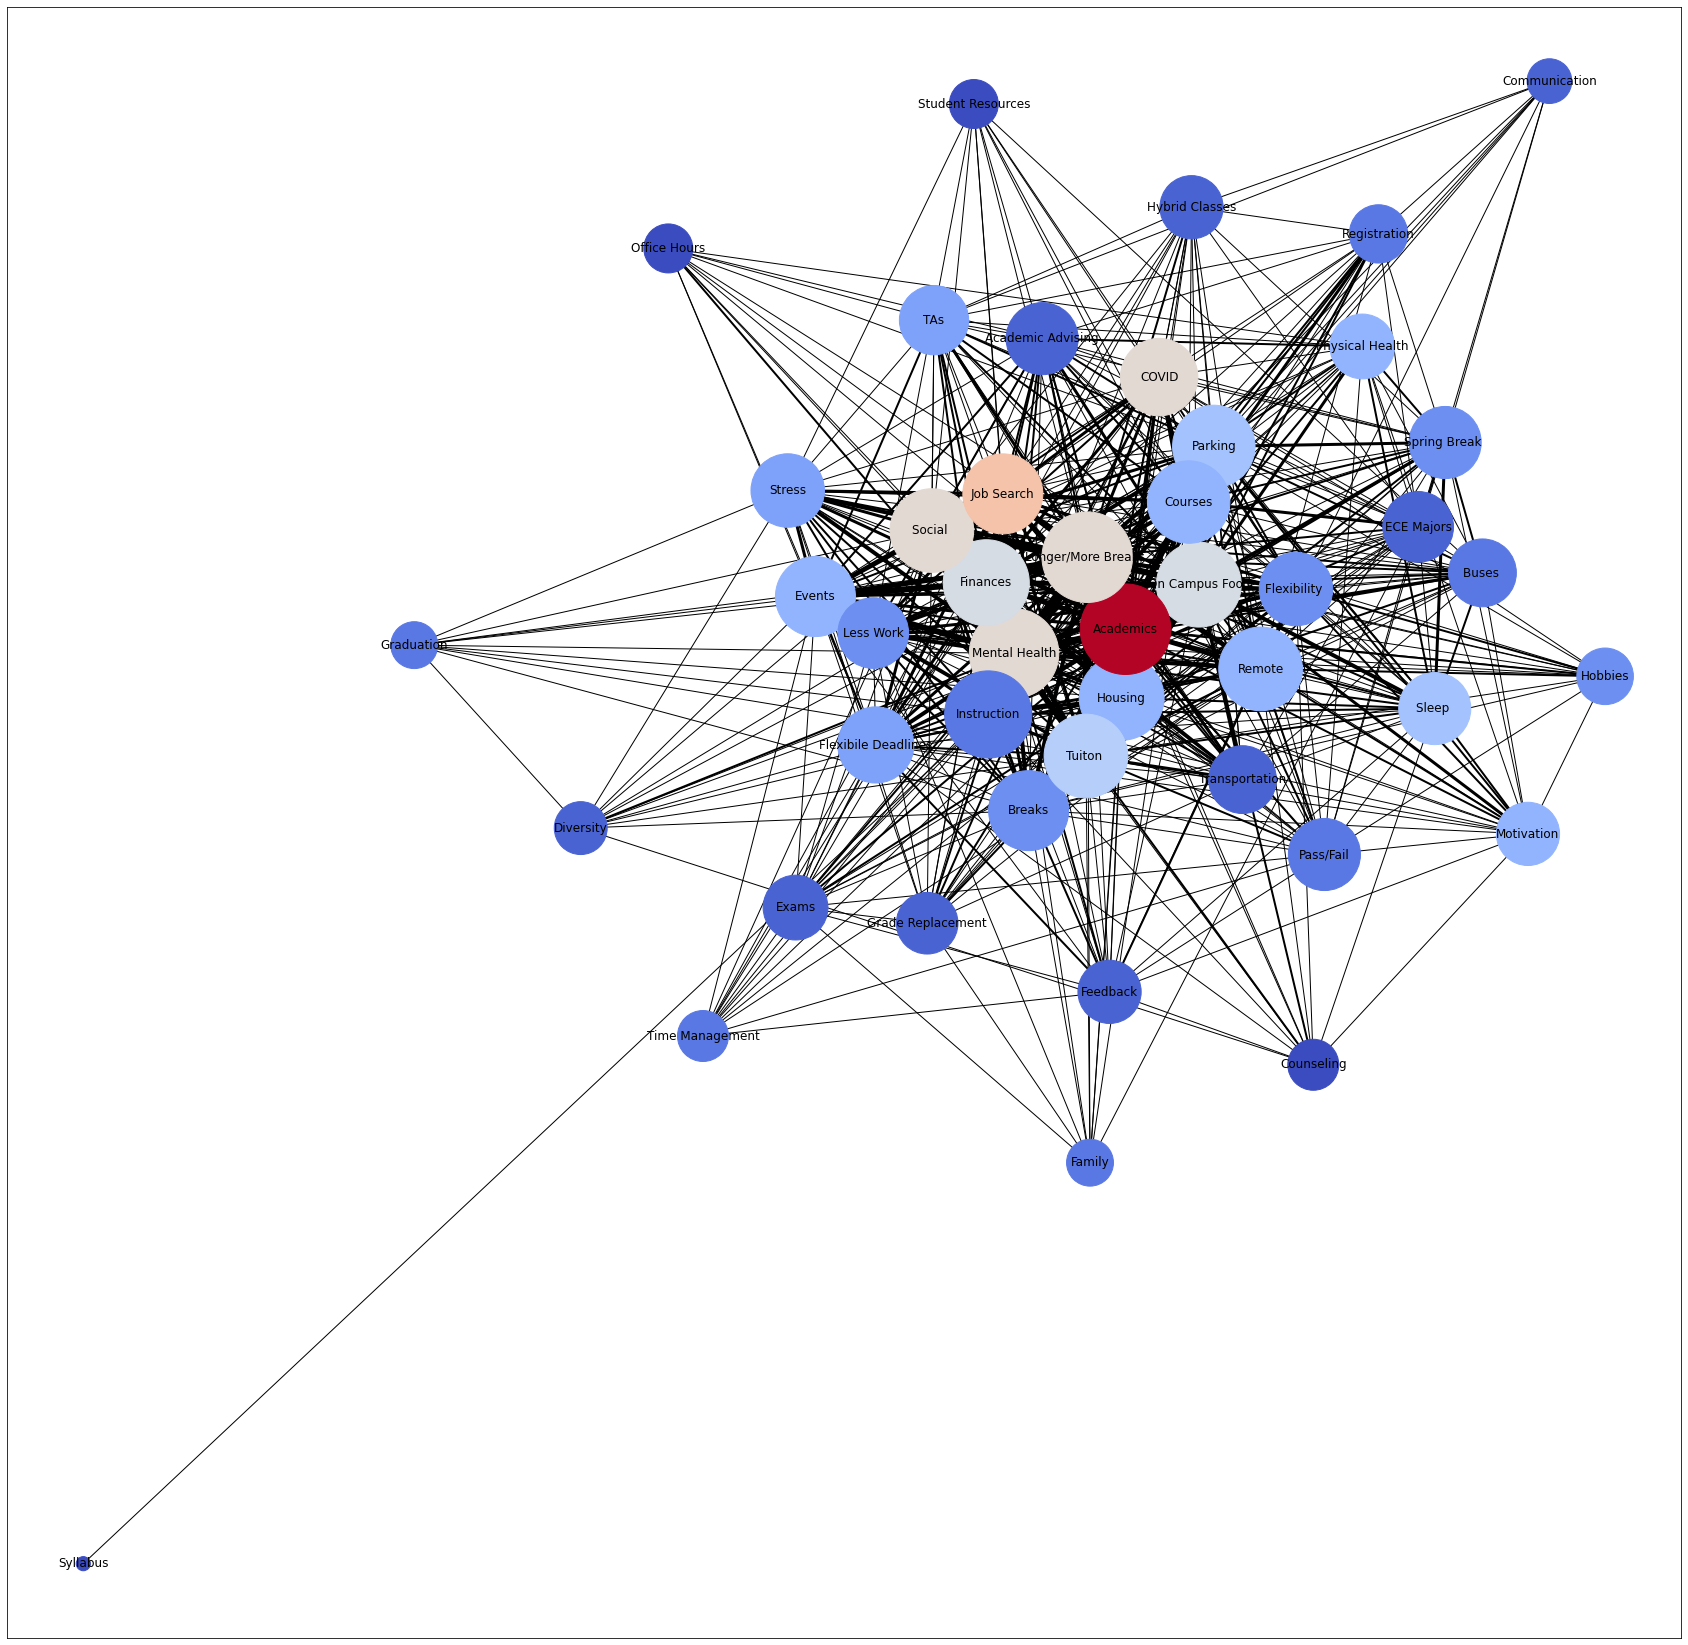

In [ ]:
# Create networkx edge list based on edge_weights list
G = nx.from_pandas_edgelist(edge_weights, "n1", "n2", "weight")
# Get list of edge weights in order to remove edges with 0 weight, meaning there is no connection between those two nodes
weights = nx.get_edge_attributes(G,'weight')
# Remove 0 weight edges
G.remove_edges_from((edge for edge,weight in weights.items() if weight == 0))
# Assign weight attribute to each node based on values in node_weights
# Based on node_weights2 dataframe.  Using first column n1 as index
nodeAttr = node_weights2.set_index('n1').to_dict('index')
nx.set_node_attributes(G, nodeAttr)
# Set plot size so network map is not cramped
plt.figure(figsize = (30,30))
# Set node color to the degree of the node, aka how many links are connected to the node
low, *_, high = sorted(nx.get_node_attributes(G, 'weight').values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

# Set size of the node based on the weight of the node
# Scaled by 400 for visibility on the graph  
node_size = [200 * G.degree(v) for v in G]
# Draw network
#[200 * nx.get_node_attributes(G, 'weight')[v] for v in G]
#pos = nx.shell_layout(G)
#nx.draw_networkx_edges(G,pos,)
edge_width = [a[2]['weight'] for a in G.edges(data=True)]
'''
for entry in edge_width:
  print(entry)
for entry in edge_weights['weight']:
  print(entry)

print(len(edge_width))
print(len(edge_weights))
'''
nx.draw_networkx(G, node_size = node_size, node_color = [mapper.to_rgba(i) for i in  nx.get_node_attributes(G, 'weight').values()], alpha = 1.0, with_labels=True, cmap = plt.cm.Reds, width=edge_width) #width=edge_weights['weight'])